# Lab 8: Implement Your Machine Learning Project Plan

In this lab assignment, you will implement the machine learning project plan you created in the written assignment. You will:

1. Load your data set and save it to a Pandas DataFrame.
2. Perform exploratory data analysis on your data to determine which feature engineering and data preparation techniques you will use.
3. Prepare your data for your model and create features and a label.
4. Fit your model to the training data and evaluate your model.
5. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.

### Import Packages

Before you get started, import a few packages.

In [2]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need for this task.

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import time

## Part 1: Load the Data Set


You have chosen to work with one of four data sets. The data sets are located in a folder named "data." The file names of the three data sets are as follows:

* The "adult" data set that contains Census information from 1994 is located in file `adultData.csv`
* The airbnb NYC "listings" data set is located in file  `airbnbListingsData.csv`
* The World Happiness Report (WHR) data set is located in file `WHR2018Chapter2OnlineData.csv`
* The book review data set is located in file `bookReviewsData.csv`



<b>Task:</b> In the code cell below, use the same method you have been using to load your data using `pd.read_csv()` and save it to DataFrame `df`.

In [5]:
filename=os.path.join(os.getcwd(),"data","bookReviewsData.csv")
df= pd.read_csv(filename, header=0)

## Part 2: Exploratory Data Analysis

The next step is to inspect and analyze your data set with your machine learning problem and project plan in mind. 

This step will help you determine data preparation and feature engineering techniques you will need to apply to your data to build a balanced modeling data set for your problem and model. These data preparation techniques may include:
* addressing missingness, such as replacing missing values with means
* renaming features and labels
* finding and replacing outliers
* performing winsorization if needed
* performing one-hot encoding on categorical features
* performing vectorization for an NLP problem
* addressing class imbalance in your data sample to promote fair AI


Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.


<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. 

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [6]:
df.head()

,Review,Positive Review
0,This was perhaps the best of Johannes Steinhof...,True
1,This very fascinating book is a story written ...,True
2,The four tales in this collection are beautifu...,True
3,The book contained more profanity than I expec...,False
4,We have now entered a second time of deep conc...,True


In [8]:
#Address missingness
df.isnull().values.any()

False

In [11]:
#renaming features and labels
y=df['Positive Review']
X=df['Review']

## Part 3: Implement Your Project Plan

<b>Task:</b> Use the rest of this notebook to carry out your project plan. You will:

1. Prepare your data for your model and create features and a label.
2. Fit your model to the training data and evaluate your model.
3. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.


Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit.

In [12]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.20, random_state=1234)

In [13]:
X_train.head()

1369    As my brother said when flipping through this ...
1366    Cooper's book is yet another warm and fuzzy ma...
385     I have many robot books and this is the best a...
750     As China re-emerges as a dominant power in the...
643     I have been a huge fan of Michael Crichton for...
Name: Review, dtype: object

In [14]:
# 1. Create a TfidfVectorizer object 
# YOUR CODE HERE
tfidf_vectorizer=TfidfVectorizer()

# 2. Fit the vectorizer to X_train
# YOUR CODE HERE
tfidf_vectorizer.fit(X_train)

# 3. Using the fitted vectorizer, transform the training data 
# YOUR CODE HERE
X_train_tfidf=tfidf_vectorizer.transform(X_train)

# 4. Using the fitted vectorizer, transform the test data 
# YOUR CODE HERE
X_test_tfidf=tfidf_vectorizer.transform(X_test)

In [15]:
vocabulary_size = len(tfidf_vectorizer.vocabulary_)

print(vocabulary_size)

19029


In [17]:
# 1. Create model object
nn_model=keras.Sequential()


# 2. Create the input layer and add it to the model object: 

# Create input layer:
input_layer = keras.layers.InputLayer(input_shape=(vocabulary_size,)) 
nn_model.add(input_layer) 


# 3. Create the first hidden layer and add it to the model object:

hidden_layer_1 =keras.layers.Dense(units=64,activation='relu')

nn_model.add(hidden_layer_1) 


# 4. Create the second layer and add it to the model object:
hidden_layer_2 = keras.layers.Dense(units=32,activation='relu')
nn_model.add(hidden_layer_2) 


# 5. Create the third layer and add it to the model object:

# Create input layer:
hidden_layer_3 = keras.layers.Dense(units=16,activation='relu')
nn_model.add(hidden_layer_3)

nn_model.add(keras.layers.Dropout(.25))

# 6. Create the output layer and add it to the model object:

output_layer = keras.layers.Dense(units=1,activation='sigmoid')
nn_model.add(output_layer)


# Print summary of neural network model structure
nn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                1217920   
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_6 (Dense)              (None, 16)                528       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 17        
Total params: 1,220,545
Trainable params: 1,220,545
Non-trainable params: 0
_________________________________________________________________


In [18]:
sgd_optimizer=keras.optimizers.SGD(learning_rate=0.1)

In [19]:
loss_fn=keras.losses.BinaryCrossentropy(from_logits=False)

In [20]:
nn_model.compile(optimizer=sgd_optimizer,loss=loss_fn,metrics=['accuracy'])

In [21]:
class ProgBarLoggerNEpochs(keras.callbacks.Callback):
    
    def __init__(self, num_epochs: int, every_n: int = 50):
        self.num_epochs = num_epochs
        self.every_n = every_n
    
    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % self.every_n == 0:
            s = 'Epoch [{}/ {}]'.format(epoch + 1, self.num_epochs)
            logs_s = ['{}: {:.4f}'.format(k.capitalize(), v)
                      for k, v in logs.items()]
            s_list = [s] + logs_s
            print(', '.join(s_list))

In [22]:
t0 = time.time() # start time

num_epochs = 50 #epochs

history = nn_model.fit(
    X_train_tfidf.toarray(), 
    y_train,
    epochs=num_epochs,
    verbose=0,
    callbacks=[ProgBarLoggerNEpochs(num_epochs, every_n=50)],
    validation_split=0.2)



t1 = time.time() # stop time

print('Elapsed time: %.2fs' % (t1-t0))

Epoch [50/ 50], Loss: 0.0179, Accuracy: 0.9992, Val_loss: 0.5969, Val_accuracy: 0.7880
Elapsed time: 16.15s


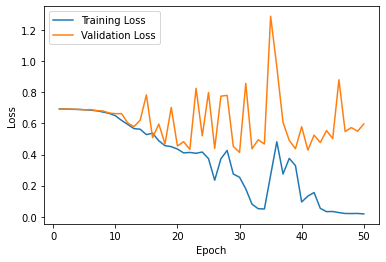

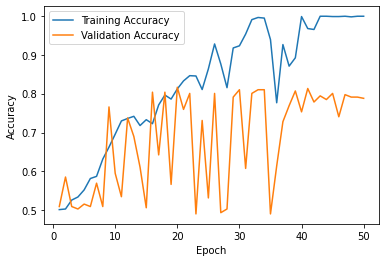

In [23]:
# Plot training and validation loss
plt.plot(range(1, num_epochs + 1), history.history['loss'], label='Training Loss')
plt.plot(range(1, num_epochs + 1), history.history['val_loss'], label='Validation Loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Plot training and validation accuracy
plt.plot(range(1, num_epochs + 1), history.history['accuracy'], label='Training Accuracy')
plt.plot(range(1, num_epochs + 1), history.history['val_accuracy'], label='Validation Accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [24]:
loss, accuracy = nn_model.evaluate(X_test_tfidf.toarray(),y_test)


print('Loss: ', str(loss) , 'Accuracy: ', str(accuracy))

13/13 [==============================] - 0s 3ms/step - loss: 0.5689 - accuracy: 0.8177
Loss:  0.5688654780387878 Accuracy:  0.8177215456962585


In [25]:
probability_predictions = nn_model.predict(X_test_tfidf.toarray())

print("Predictions for the first 10 examples:")
print("Probability\t\t\tClass")
for i in range(0,10):
    if probability_predictions[i] >= .5:
        class_pred = "Good Review"
    else:
        class_pred = "Bad Review"
    print(str(probability_predictions[i]) + "\t\t\t" + str(class_pred))

Predictions for the first 10 examples:
Probability			Class
[0.9908728]			Good Review
[0.82569164]			Good Review
[0.15882784]			Bad Review
[0.23800078]			Bad Review
[0.79003483]			Good Review
[0.8234813]			Good Review
[0.00339946]			Bad Review
[1.2937659e-05]			Bad Review
[0.993831]			Good Review
[0.9942745]			Good Review


In [26]:
print('Review #1:\n')
print(X_test.to_numpy()[56])

goodReview = True if probability_predictions[56] >= .5 else False
    
print('\nPrediction: Is this a good review? {}\n'.format(goodReview))

print('Actual: Is this a good review? {}\n'.format(y_test.to_numpy()[56]))

Review #1:

This commentary has many tremendous insights into the book of Romans.  Romans is one of the richest resources of truth within the Bible and John Stoot does a good job of unpacking it.  The book is written from a framework of the reader having a strong prior understanding of the Scriptures.  It is probably not considered a highly scholarly work, but it is not for the average reader to pick up for light reading either


Prediction: Is this a good review? True

Actual: Is this a good review? True



In [27]:
print('Review #2:\n')
print(X_test.to_numpy()[24])

goodReview = True if probability_predictions[24] >= .5 else False

print('\nPrediction: Is this a good review? {}\n'.format(goodReview)) 

print('Actual: Is this a good review? {}\n'.format(y_test.to_numpy()[24]))

Review #2:

I have read Baldacci's first four novels and have immensely enjoyed all of them.  This one, however, is just awful.  Not only the character's dialogue but even the story itself is written like a really bad detective movie.  The only thing I can think of to compare it to is this :  There was a series of Calvin and Hobbes cartoons where Calvin imagines himself as a private detective and they are written like the old detective shows, with lame lines like "The gun was loaded, and so was I".  That is exactly what this book is like, except it goes on for 400 pages.  There isn't a single interesting character in this book, in my opinion.  You just have to slog your way through the book to get to the end.  It's the Bataan Death March of novels.  I hope this is an aberration - I'll certainly give him another try since the first four novels that I read were so good.  But one more stinker like this one and I'll drop his name from my reading list


Prediction: Is this a good review? Fa

In [ ]:
#addressing class imbalance in your data sample to promote fair AI:

#I do not believe that their is an imbalance here.